<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/loss_fun_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
lossfunMSE=nn.MSELoss()
yhat=torch.linspace(-2,2,101)
y=torch.tensor(1.)
L=np.zeros(101)
for i,yy in enumerate(yhat):
  L[i]=lossfunMSE(yy,y)

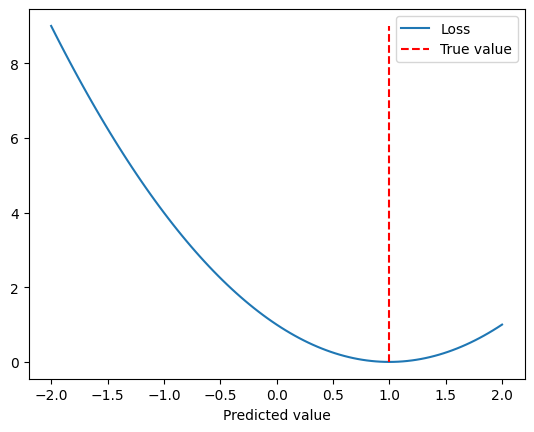

In [6]:
plt.plot(yhat,L,label='Loss')
plt.plot([y,y],[0,np.max(L)],'r--',label='True value')
plt.xlabel('Predicted value')
plt.legend()
plt.show()

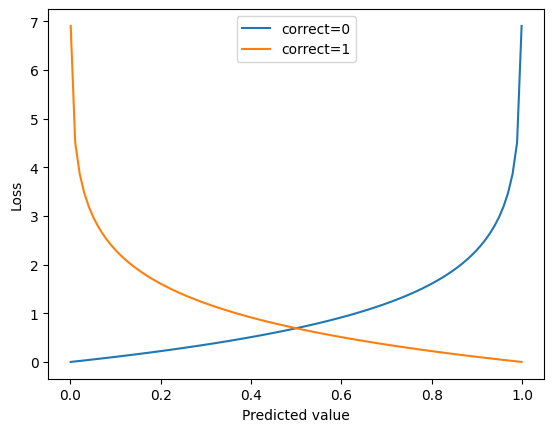

In [7]:
# loss function
lossfunBCE = nn.BCELoss()

# create predictions and real answer
yHat = torch.linspace(.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# compute MSE loss function
L = np.zeros((101,2))
for i,yy in enumerate(yHat):
  L[i,0] = lossfunBCE(yy,y1) # 0 is the correct answer
  L[i,1] = lossfunBCE(yy,y2) # 1 is the correct answer

plt.plot(yHat,L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.legend(['correct=0','correct=1'])
# plt.yscale('log')
plt.show()

In [8]:
# The example above shows data already in probabilities. Raw outputs will need to be converted to probabilities:

# "raw" output of a model
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))



RuntimeError: all elements of input should be between 0 and 1

In [10]:
# convert to prob via sigmoid
sig = nn.Sigmoid()
print(lossfunBCE( sig(yHat) ,y2))


tensor(0.3467)


In [9]:
# However, PyTorch recommends using a single function that incorporates sigmoid+BCE due to increased numerical stability.
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=nn%20bcewithlogitsloss#torch.nn.BCEWithLogitsLoss


# Thus, the recommended way to do it:
lossfunBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))

# In toy examples, numerical accuracy usually isn't a problem.

tensor(0.1269)


In [11]:
# loss function
lossfunCCE = nn.CrossEntropyLoss()

# vector of output layer (pre-softmax)
yHat = torch.tensor([[1.,4,3]])

for i in range(3):
  correctAnswer = torch.tensor([i])
  thisloss = lossfunCCE(yHat,correctAnswer).item()
  print( 'Loss when correct answer is %g: %g' %(i,thisloss) )

Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [12]:
class myLoss(nn.Module): # inherent info from nn.Module
  def __init__(self):
    super().__init__()

  def forward(self,x,y):
    loss = torch.abs(x-y)
    return loss

# test it out!
lfun = myLoss()
lfun(torch.tensor(4),torch.tensor(5.2))

tensor(1.2000)